Load the data

In [7]:
import pandas as pd

df = pd.read_excel('/Users/annamohn/Desktop/Hertie School/Master Thesis/Qualitative Analysis/Qualitative Analysis.xlsx')

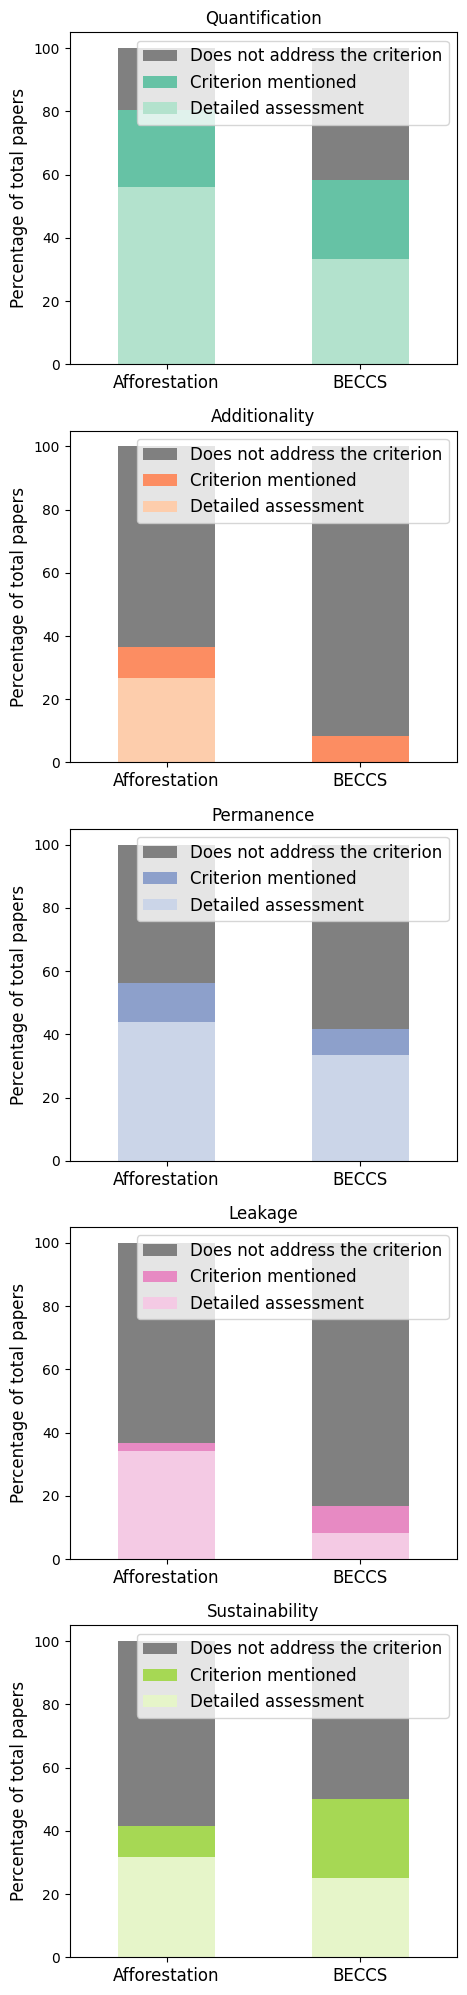

In [10]:
import matplotlib.pyplot as plt

criteria_all = ['Quantification', 'Additionality', 'Permanence', 'Leakage', 'Sustainability']

colors_1 = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854']
colors_2 = ['#b3e2cd','#fdcdac','#cbd5e8','#f4cae4','#e6f5c9']

#Calculate the sum of Afforestation and BECCS columns
ar_sum = df['Afforestation'].sum()
beccs_sum = df['BECCS'].sum()

#Create the subplots
fig, axs = plt.subplots(nrows=len(criteria_all), ncols=1, figsize=(5, 25), sharex=False)

#Loop through the criteria and create a bar plot for each criterion
for i,criteria in enumerate(criteria_all):
    
    ar_ad_sum = df.loc[(df['Afforestation'] == 1) & (df[criteria] == 1), criteria].sum()
    ar_ad_pct = (ar_ad_sum / ar_sum) * 100

    beccs_ad_sum = df.loc[(df['BECCS'] == 1) & (df[criteria] == 1), criteria].sum()
    becss_ad_pct = (beccs_ad_sum / beccs_sum) * 100

    ar_ad_cta_sum = df.loc[(df['Afforestation'] == 1) & (df[criteria] == 1) 
                       & (df['Description & Evaluation of certification criteria'] == 1), 'Description & Evaluation of certification criteria'].sum()
    ar_ad_cta_pct = (ar_ad_cta_sum / ar_sum) * 100

    beccs_ad_cta_sum = df.loc[(df['BECCS'] == 1) & (df[criteria] == 1) 
                       & (df['Description & Evaluation of certification criteria'] == 1), 'Description & Evaluation of certification criteria'].sum()
    beccs_ad_cta_pct = (beccs_ad_cta_sum / beccs_sum) * 100

    # Create the data frame
    labels = ['Afforestation', 'BECCS']
    cta_pct = [ar_ad_cta_pct, beccs_ad_cta_pct]
    ad_pct = [ar_ad_pct, becss_ad_pct]
    totals = 100
    data_ex = pd.DataFrame({'Total': totals, criteria: ad_pct, 'Detailed Assessment': cta_pct})
    data_ex.to_csv(f'{criteria}.csv', index=False)
    color_1 = colors_1[i % len(colors_1)]
    color_2 = colors_2[i % len(colors_2)]
    
    # Create the bar chart
    ax = axs[i]
    ax.set_ylabel('Percentage of total papers', fontsize = 12)
    data_ex['Total'].plot(kind='bar', ax=ax, color='grey')
    data_ex[criteria].plot(kind='bar', ax=ax, color=color_1)
    data_ex['Detailed Assessment'].plot(kind='bar', ax=ax, color=color_2)
    ax.set_xticklabels(labels, rotation=0, fontsize = 12)
    ax.legend(['Does not address the criterion', 'Criterion mentioned', 'Detailed assessment'], loc='upper right', fontsize = 12)
    ax.set_title(criteria, fontsize=12)
    
fig.subplots_adjust(hspace = 0.2)
fig.savefig('../MT data/Certification_graph.png', dpi=300, bbox_inches='tight')